# Chapter 6. Multiple Linear Regression

### Multiple Linear Regression :
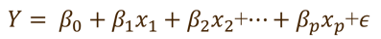
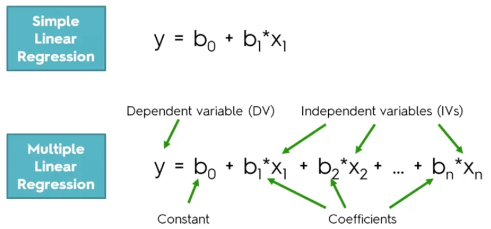
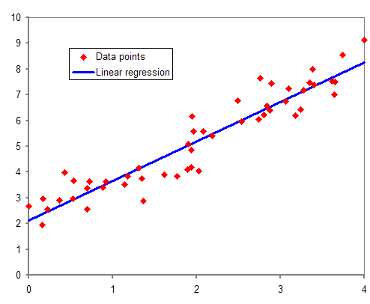
- The most popular model for making predictions
- This model is used to fit a relationship between a numerical outcome variable Y (also called the response, target, or dependent variable) and a set of predictorsX1, X2, …, Xp (also referred to as independent variables, input variables, regressors, or covariates).


### Summary
- Linear regression models are very popular tools, not only for `explanatory modeling`, but also for `prediction`
- A good predictive model has high predictive accuracy (to a useful practical level)
- Predictive models are fit to `training data`, and predictive accuracy is evaluated on a separate `validation data set`
- Removing redundant predictors is key to achieving predictive accuracy and robustness
- Subset selection methods help find “good” candidate models. These should then be run and assessed


#### Explanatory vs. predictive modeling with regression
1. Explanatory Modeling
- Goal: Explain relationship between predictors (explanatory variables) and target 
- Familiar use of regression in data analysis
- Model Goal: Fit the data well and understand the contribution of explanatory variables to the model
- “goodness-of-fit”: R2, residual analysis, p-values
- Explaining role of predictors is primary purpose

2. Predictive Modeling
- Goal: Predict target values in other data where we have predictor values, but not target values
- Classic data mining context
- Model Goal: Optimize predictive accuracy
- Train model on training data
- Assess performance on validation (hold-out) data
- Explaining role of predictors is not primary purpose (but useful)


#### Variable Selection in Linear Regression

Reducing the Number of Predictors : A frequent problem in data mining is that of using a regression equation to predict the value of a dependent variable when we have many variables available to choose as predictors in our model.

How to Reduce the Number of Predictors : 
1. Exhaustive Search : fitting regression models with all the possible combinations of predictors. 
2. Partial Search Algorithms

- Forward Selection
    - Start with no predictors
    - Add them one by one (add the one with largest contribution)
    - Stop when the addition is not statistically significant
- Backward Elimination
    - Start with all predictors
    - Successively eliminate least useful predictors one by one
    - Stop when all remaining predictors have statistically significant contribution
- Stepwise
    - Like Forward Selection, except at each step, also consider dropping non-significant predictors
    
    
    
Finally, additional ways to reduce the dimension of the data are by using principal
components (Chapter 4) and regression trees (Chapter 9).

## Example: Predicting the Price of Used Toyota Corolla Cars

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

no display found. Using non-interactive Agg backend


In [21]:
import pandas as pd
car_df = pd.read_csv('ToyotaCorolla.csv')

### Make Data for Regression Model

In [22]:
# Preprocessing : reduce data frame to the top 1000 rows and select columns for regression analysis
car_df = car_df.iloc[0:1000]
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc','Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price'
X = pd.get_dummies(car_df[predictors], drop_first=True)
y = car_df[outcome]

# partition data: Train, validation set (60% training data / 40% validation data)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

### Fitted Regression Model (Linear regression model of price vs. car attributes)

In [23]:
#Fitting linear model
car_lm = LinearRegression() #run a linear regression
car_lm.fit(train_X, train_y) #fitting a regression model to training set

##Model Summary
#print coefficients
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))
#print performance measures (training data)
regressionSummary(train_y, car_lm.predict(train_X)) #‘regressionSummary()’ computes performance measures 

           Predictor  coefficient
0          Age_08_04  -140.748761
1                 KM    -0.017840
2                 HP    36.103419
3          Met_Color    84.281830
4          Automatic   416.781954
5                 cc     0.017737
6              Doors   -50.657863
7      Quarterly_Tax    13.625325
8             Weight    13.038711
9   Fuel_Type_Diesel  1066.464681
10  Fuel_Type_Petrol  2310.249543

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


### Prediction using Regression Model
fitting a regression model to training set and predicting prices in validation set

In [24]:
##Predicted Prices (and Errors) for 20 cars in validation set

#Make prediction
car_lm_pred = car_lm.predict(valid_X) #‘predict()’ function makes predictions on the valid set

#Show prediction result
result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y, 'Residual': valid_y - car_lm_pred})
print(result.head(20))

        Predicted  Actual     Residual
507  10607.333940   11500   892.666060
818   9272.705792    8950  -322.705792
452  10617.947808   11450   832.052192
368  13600.396275   11450 -2150.396275
242  12396.694660   11950  -446.694660
929   9496.498212    9995   498.501788
262  12480.063217   13500  1019.936783
810   8834.146068    7950  -884.146068
318  12183.361282    9900 -2283.361282
49   19206.965683   21950  2743.034317
446  10987.498309   11950   962.501691
142  18501.527375   19950  1448.472625
968   9914.690947    9950    35.309053
345  13827.299932   14950  1122.700068
971   7966.732543   10495  2528.267457
133  17185.242041   15950 -1235.242041
104  19952.658062   19450  -502.658062
6    16570.609280   16900   329.390720
600  13739.409113   11250 -2489.409113
496  11267.513740   11750   482.486260


### Accuracy and Validation Error

In [26]:
## Summary predictive measures for entire validation set
# Calculate performance (validation data)
regressionSummary(valid_y, car_lm_pred) #‘regressionSummary()’ computes performance measures 


Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111



Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111
0.7425


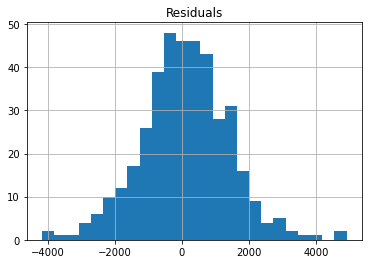

In [20]:
#Histograms of Toyota price prediction errors, for validation sets (validation errors)
%matplotlib inline
all_residuals = valid_y - car_lm_pred
# The percentage of datapoints with a residual in [-1406, 1406] = 75%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))
pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.show()

### Exhaustive Search 

In [25]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model
def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model) #‘exhaustive_search()’ function runs an exhaustive search
data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model) #‘AIC_score()’ measures the goodness of fit of a model 
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

,n,r2adj,AIC,Age_08_04,Automatic,Doors,Fuel_Type_Diesel,Fuel_Type_Petrol,HP,KM,Met_Color,Quarterly_Tax,Weight,cc
0,1,0.767901,10689.712094,True,False,False,False,False,False,False,False,False,False,False
1,2,0.801160,10597.910645,True,False,False,False,False,True,False,False,False,False,False
2,3,0.829659,10506.084235,True,False,False,False,False,True,False,False,False,True,False
3,4,0.846357,10445.174820,True,False,False,False,False,True,True,False,False,True,False
4,5,0.849044,10435.578836,True,False,False,False,False,True,True,False,True,True,False
5,6,0.853172,10419.932278,True,False,False,False,True,True,True,False,True,True,False
6,7,0.853860,10418.104025,True,False,False,True,True,True,True,False,True,True,False
7,8,0.854297,10417.290103,True,True,False,True,True,True,True,False,True,True,False
8,9,0.854172,10418.789079,True,True,True,True,True,True,True,False,True,True,False
9,10,0.854036,10420.330800,True,True,True,True,True,True,True,True,True,True,False


Because Python does not have an exhaustive search routine, we created a loop that iterates through all predictor combinations and within models with the same number of predictors, selects the models with the highest R2adj (which is equivalent to choosing one of the other measures mentioned above).


- The code reports the best model with a single predictor, two predictors, and so on.
    - 0 - **True**	False	False	False	False	False	False	False	False	False	False
    - 1 - **True**	False	False	False	False	**True**	False	False	False	False	False 

- It can be seen that the R2adj increases until eight predictors are used and then slowly decreases.
- The AIC also indicates that a model with eight predictors is good. 
- The dominant predictor in all models is the age of the car, with horsepower, weight and mileage playing important roles as well.

### Subset Selection Algorithms : forward selection
- In forward selection, we start with no predictors and then add predictors one by one.
- Use ‘forward_selection()’ to start with no predictors and then add predictors one by one

In [28]:
from dmba import forward_selection
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model
def score_model(model, variables):
     if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y),model, df=1)
     return AIC_score(train_y, model.predict(train_X[variables]), model)
best_model, best_variables = forward_selection(train_X.columns, train_model, score_model,verbose=True)
print(best_variables) #Forward Selection yields 8 Predictors

Variables: Age_08_04, KM, HP, Met_Color, Automatic, cc, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, add None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']


### Subset Selection Algorithms : backward elimination
- In backward elimination, we start with all predictors and then at each step, eliminate the least useful predictor (according to statistical significance). The algorithm stops when all the remaining predictors have significant contributions.

- Use ‘backward_elimination()’ to start with all predictors and then at each step, eliminate the least useful predictor.

In [27]:
from dmba import backward_elimination

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)
allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)
print(best_variables) #Backward yields Same 8 Predictors

regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: Age_08_04, KM, HP, Met_Color, Automatic, cc, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=10422.30
Step: score=10420.33, remove cc
Step: score=10418.79, remove Met_Color
Step: score=10417.29, remove Doors
Step: score=10417.29, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']

Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


It shows the validation performance of the 8-predictor model, which turns out to be *only* very slightly better
than the 10-predictor model (Table 6.4) in terms of validation metrics. 

It is possible there may an even smaller model, performing only slightly worse, that is preferable from a parsimony standpoint.

- Next Step ?
    - Subset selection methods give candidate models that might be “good models”
    - Do not guarantee that “best” model is indeed best
    - Also, “best” model can still have insufficient predictive accuracy
    - Must run the candidates and assess predictive accuracy

### Subset Selection Algorithms : Stepwise regression
- Stepwise regression 
    - Like forward selection	
    - Except at each step, also consider dropping non-significant predictors

In [29]:
from dmba import stepwise_selection
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)
print(best_variables) #Stepwise also yields Same 8 Predictors

Variables: Age_08_04, KM, HP, Met_Color, Automatic, cc, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, unchanged None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']


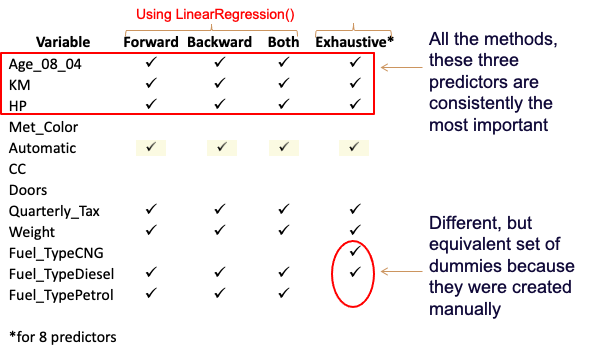